# Analyse predicted peaks form merged Datasets from CSV

* merged_search_trends_2021-06-22_095959.csv_peaks_prob.csv

### Steps
* 9 train again regression model for avg_interest ✅
* 10 train again classification model for is_peak ✅
* 11 Execute Classification with already trained model and current test data ✅


### Tests

* ✅ 44% predicció peaks a cada registre VS algoritme detecció peaks sobre tot el dataset
* ⚠️ comparar historic ventes adWords de Nucli Solar vs predicció peaks (maig-juny) % coincidencia?
* ⚠️ Applicacio python batch alertes sobre campaña si predicció de que estem en peak, avis per mail-telegram-integracioAPI… —> activacio campanya per 1 o 2 hores / pujar pressupost campanya 1 o 2 hores… durant el peak.
* ⚠️ Millorar la predicció de peaks, ajustos parametres ¿?

In [51]:
'''
IMPORTS
'''

# General
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from datetime import datetime

# Linear Regression
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scipy.signal
from sklearn import linear_model
from sklearn.metrics import r2_score

# Logistic Regression (Churn classification)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss

# SVM
from sklearn import svm
import itertools


In [5]:
'''
GLOBAL ENVIRONMENT TWITTER VARIABLES
'''
directory = "/Users/joan/Workspace/python/py-trends-api/"
base_name_merged = 'merged_search_trends_2021-06-22_095959.csv_peaks_prob.csv'


In [6]:
# Load CSV file
df = pd.read_csv(directory+base_name_merged)

## 9 Train again regression model for avg_interest

In [11]:
# Test and Train dataset
msk = np.random.rand(len(df)) < 0.3
train = df[msk]
test = df[~msk]

Coefficients:  [[0.45984481]]


Text(0, 0.5, 'avg_interest')

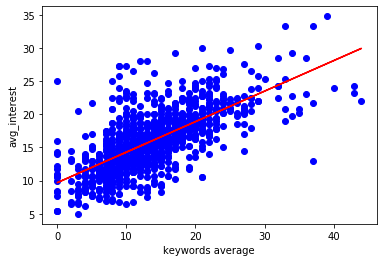

In [12]:
# model train and fit parameters
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['energia solar']]) 
y = np.asanyarray(train[['avg_interest']])
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)

plt.scatter(train['energia solar'], train.avg_interest,  color='blue')
plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r')
plt.xlabel("keywords average")
plt.ylabel("avg_interest")

In [13]:
# Accuracy error
test_x = np.asanyarray(test[['energia solar']])
test_y = np.asanyarray(test[['avg_interest']])

test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_hat) )

Mean absolute error: 2.55
Residual sum of squares (MSE): 11.42
R2-score: 0.48


In [16]:
# Train Regression MULTI
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['placas solares','energia solar']]) 
y = np.asanyarray(train[['avg_interest']])
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[0.24994372 0.24985456]]


In [18]:
# Accuracy Regression MULTI

y_hat= regr.predict(test[['placas solares','energia solar']])

x = np.asanyarray(test[['placas solares','energia solar']])
y = np.asanyarray(test[['avg_interest']])
print("Residual sum of squares: %.2f"  % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , y_hat) )

Residual sum of squares: 0.00
Variance score: 1.00
Mean absolute error: 0.01
Residual sum of squares (MSE): 0.00
R2-score: 1.00


## 10 train again Logistic Regression classification model for is_peak



In [19]:
# Lets define X, and y for our dataset:
#X = np.asarray(df[['energia solar','placas solares','max_interest','avg_interest']])
X = np.asarray(df[['year','month','day','hour','energia solar','placas solares','max_interest','avg_interest']])
X[0:5]
y = np.asarray(df['is_peak'])
y [0:5]

# Also, we normalize the dataset:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.05681146, -1.38489182, -1.58211529, -1.64439387, -1.44528557,
        -2.07560698, -2.08166069, -2.17692209],
       [-0.05681146, -1.38489182, -1.58211529, -1.50167592, -0.69673449,
        -2.21168246, -2.21802039, -2.01435354],
       [-0.05681146, -1.38489182, -1.58211529, -1.35895798,  0.80036767,
        -1.46326735, -1.46804201, -0.87637374],
       [-0.05681146, -1.38489182, -1.58211529, -1.21624003,  0.05181659,
        -2.14364472, -2.14984054, -1.68921646],
       [-0.05681146, -1.38489182, -1.58211529, -1.07352209,  0.95007789,
        -0.71485225, -0.71806363, -0.22609957]])

In [20]:
X[0:5]

array([[-0.05681146, -1.38489182, -1.58211529, -1.64439387, -1.44528557,
        -2.07560698, -2.08166069, -2.17692209],
       [-0.05681146, -1.38489182, -1.58211529, -1.50167592, -0.69673449,
        -2.21168246, -2.21802039, -2.01435354],
       [-0.05681146, -1.38489182, -1.58211529, -1.35895798,  0.80036767,
        -1.46326735, -1.46804201, -0.87637374],
       [-0.05681146, -1.38489182, -1.58211529, -1.21624003,  0.05181659,
        -2.14364472, -2.14984054, -1.68921646],
       [-0.05681146, -1.38489182, -1.58211529, -1.07352209,  0.95007789,
        -0.71485225, -0.71806363, -0.22609957]])

In [21]:
# Train and test Dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2238, 8) (2238,)
Test set: (1492, 8) (1492,)


In [22]:
X_test

array([[-0.05681146,  1.50126668, -1.1156839 , ..., -0.03447489,
        -0.0362651 , -0.55123666],
       [-0.05681146,  1.50126668,  0.7500417 , ..., -0.91896546,
        -0.92260319, -1.0931318 ],
       [-0.05681146, -0.80766012, -0.76586035, ...,  2.14273268,
         2.14549019,  1.941481  ],
       ...,
       [-0.05681146,  1.50126668,  0.16700245, ...,  0.3057138 ,
         0.30463416,  0.47836411],
       [-0.05681146, -0.23042842,  1.09986524, ...,  0.37375153,
         0.37281402, -0.44285763],
       [-0.05681146,  0.92403498,  1.21647309, ..., -0.4427013 ,
        -0.44534422, -0.82218423]])

In [23]:
# Fit coeficients and variables
LR = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
LRyhat = LR.predict(X_test)

In [24]:
# Now we can predict categorical classification using our test set:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
# predict_proba returns estimates for all classes, ordered by the label of classes. 
# So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.98499361, 0.01500639],
       [0.97435986, 0.02564014],
       [0.66419635, 0.33580365],
       ...,
       [0.85997931, 0.14002069],
       [0.93921443, 0.06078557],
       [0.99303214, 0.00696786]])

In [26]:
# Evaluation
# Jaccard
jaccard_score(y_test, yhat,pos_label=1)

0.3597560975609756

In [27]:
# Evaluation
# Confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[  59   92]
 [  13 1328]]


Confusion matrix, without normalization
[[  59   92]
 [  13 1328]]


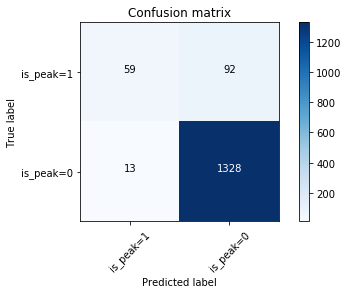

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['is_peak=1','is_peak=0'],normalize= False,  title='Confusion matrix')

In [29]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1341
           1       0.82      0.39      0.53       151

    accuracy                           0.93      1492
   macro avg       0.88      0.69      0.75      1492
weighted avg       0.92      0.93      0.92      1492



In [30]:
# Log loss
# from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.2063320417076525

## 10.2 SVM classification model for is_peak

In [39]:
df.head()

,date,energia solar,placas solares,year,month,day,hour,min_interest,max_interest,google_interest,is_peak,twitter_interest,avg_interest,is_peak_prob2,is_peak_prob
0,2021-01-01 00:00:00,4.0,20.0,2021,1,1,0,4.0,20.0,12.0,0,0.0,6.00,0.0,0
1,2021-01-01 01:00:00,9.0,18.0,2021,1,1,1,9.0,18.0,13.5,0,0.0,6.75,0.0,0
2,2021-01-01 02:00:00,19.0,29.0,2021,1,1,2,19.0,29.0,24.0,0,0.0,12.00,0.0,0
3,2021-01-01 03:00:00,14.0,19.0,2021,1,1,3,14.0,19.0,16.5,0,0.0,8.25,0.0,0
4,2021-01-01 04:00:00,20.0,40.0,2021,1,1,4,20.0,40.0,30.0,0,0.0,15.00,0.0,0


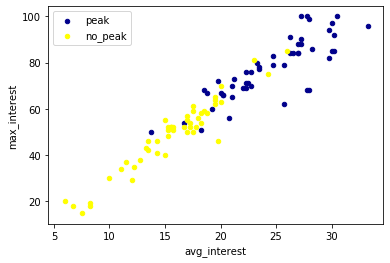

In [46]:
ax = df[df['is_peak'] == 1][0:50].plot(kind='scatter', x='avg_interest', y='max_interest', color='DarkBlue', label='peak');
df[df['is_peak'] == 0][0:50].plot(kind='scatter', x='avg_interest', y='max_interest', color='Yellow', label='no_peak', ax=ax);
plt.show()

In [43]:
df.dtypes

date                 object
energia solar       float64
placas solares      float64
year                  int64
month                 int64
day                   int64
hour                  int64
min_interest        float64
max_interest        float64
google_interest     float64
is_peak               int64
twitter_interest    float64
avg_interest        float64
is_peak_prob2       float64
is_peak_prob          int64
dtype: object

In [47]:
# Train / Test dataset
feature_df = df[['year','month','day','hour','energia solar','placas solares','max_interest','avg_interest']]
X = np.asarray(feature_df)
X[0:5]

y = np.asarray(df['is_peak'])
y [0:5]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2984, 8) (2984,)
Test set: (746, 8) (746,)


In [49]:
# Training model
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [50]:
# Predict peaks
# After being fitted, the model can then be used to predict new values:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  0  83]
 [  0 663]]


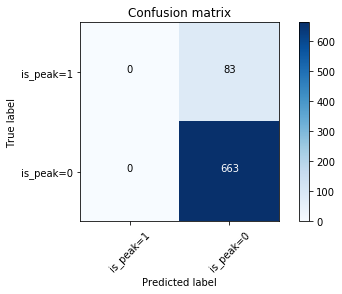

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['is_peak=1','is_peak=0'],normalize= False,  title='Confusion matrix')

In [56]:
# IS NOT THE CASE FOR SVM

## 11 Execute Classification with already trained model and current test data

This is based on having pre-loaded the CSV files from yesterday and trained a prediction model with it. And then to get current updated data to predict its peaks with the already trained model.
**This is possible by loading into Dataset df the current merged file without re-instantiate the already existing LogisticRegression module variable.**

In [31]:
# A. Set to compare pre-loaded with current
X_current = np.asarray(df[['year','month','day','hour','energia solar','placas solares','max_interest','avg_interest']])
X_current[0:5]

# Also, we normalize the dataset:
X_current = preprocessing.StandardScaler().fit(X_current).transform(X_current)
X_current[0:5]

array([[-0.06, -1.38, -1.58, -1.64, -1.45, -2.08, -2.08, -2.18],
       [-0.06, -1.38, -1.58, -1.5 , -0.7 , -2.21, -2.22, -2.01],
       [-0.06, -1.38, -1.58, -1.36,  0.8 , -1.46, -1.47, -0.88],
       [-0.06, -1.38, -1.58, -1.22,  0.05, -2.14, -2.15, -1.69],
       [-0.06, -1.38, -1.58, -1.07,  0.95, -0.71, -0.72, -0.23]])

In [32]:
# A. Train and test Dataset
X_train, X_test, y_train, y_test = train_test_split( X_current, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2611, 8) (2611,)
Test set: (1119, 8) (1119,)


In [33]:
# A. Fit coeficients
LR = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
LRyhat = LR.predict(X_test)

In [34]:
# A. Now we can predict using our test set:
yhat_current = LR.predict(X_current)
yhat_current

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
# A. predict_proba returns estimates for all classes, ordered by the label of classes. 
# So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):
yhat_prob_current = LR.predict_proba(X_current)
yhat_prob_current

array([[0.99, 0.01],
       [0.99, 0.01],
       [0.97, 0.03],
       ...,
       [0.89, 0.11],
       [0.93, 0.07],
       [0.93, 0.07]])

In [36]:
# Mark registry as a peak 1 = true or not 0 = false
df['is_peak_prob2'] = 0
for i in range(0,len(yhat_prob_current)):
    if yhat_prob_current[i][1] >= 0.5:  # % probability to be a peak
        df.loc[i,['is_peak_prob2']] = yhat_prob_current[i][1]

df['is_peak_prob'] = 0
for i in range(0,len(yhat_current)):
    df.loc[i,['is_peak_prob']] = yhat_current[i]

filter = df['is_peak'] == 1 # check updates
num_peaks = len(df[filter])
print("Peaks detected: " + str(num_peaks))
filter = df['is_peak_prob'] == 1 # check updates
num_peaks_prob = len(df[filter])
print("Peaks predicted: " + str(num_peaks_prob))
filter = df['is_peak_prob2'] >= 0.5 # check updates
num_peaks_prob2 = len(df[filter])
print("Peaks prob predicted: " + str(num_peaks_prob2))

print("Real detected peaks vs Predicted peaks coincidence: " + str(num_peaks_prob/num_peaks) + "%")

Peaks detected: 372
Peaks predicted: 162
Peaks prob predicted: 162
Real detected peaks vs Predicted peaks coincidence: 0.43548387096774194%


In [38]:
# 8 Save Dataset into CSV file
dateTimeObj = datetime.now()
current_date = dateTimeObj.strftime("%Y-%m-%d_%H%M%S")
filename = "merged_search_trends_" + current_date

df.to_csv(directory + filename + "_peaks_detected_prob.csv", index = False)
print("Saved file to: " + directory + filename + "_peaks_detected_prob.csv")

Saved file to: /Users/joan/Workspace/python/py-trends-api/merged_search_trends_2021-06-22_111944_peaks_detected_prob.csv


## adWords historic peaks comparisson with predicted peaks

* Sandra envia dades actualitzades, 40-50% predicció efectiva. Falten més dades de juny.
